In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D  = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize  = x_Test4D / 255

y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot  = np_utils.to_categorical(y_Test)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [3]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 17s - loss: 0.5179 - accuracy: 0.8380 - val_loss: 0.1001 - val_accuracy: 0.9697
Epoch 2/20
160/160 - 18s - loss: 0.1426 - accuracy: 0.9577 - val_loss: 0.0636 - val_accuracy: 0.9813
Epoch 3/20
160/160 - 19s - loss: 0.0996 - accuracy: 0.9701 - val_loss: 0.0507 - val_accuracy: 0.9846
Epoch 4/20
160/160 - 20s - loss: 0.0802 - accuracy: 0.9763 - val_loss: 0.0465 - val_accuracy: 0.9858
Epoch 5/20
160/160 - 21s - loss: 0.0680 - accuracy: 0.9799 - val_loss: 0.0419 - val_accuracy: 0.9877
Epoch 6/20
160/160 - 22s - loss: 0.0597 - accuracy: 0.9821 - val_loss: 0.0384 - val_accuracy: 0.9887
Epoch 7/20
160/160 - 22s - loss: 0.0534 - accuracy: 0.9844 - val_loss: 0.0382 - val_accuracy: 0.9893
Epoch 8/20
160/160 - 21s - loss: 0.0492 - accuracy: 0.9857 - val_loss: 0.0342 - val_accuracy: 0.9906
Epoch 9/20
160/160 - 22s - loss: 0.0429 - accuracy: 0.9872 - val_loss: 0.0307 - val_accuracy: 0.9912
Epoch 10/20
160/160 - 21s - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0323 - val_accura

In [4]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [6]:
#show_train_history('acc','val_acc')
train_history.history.keys()

dict_keys(['loss', 'val_loss', 'val_accuracy', 'accuracy'])

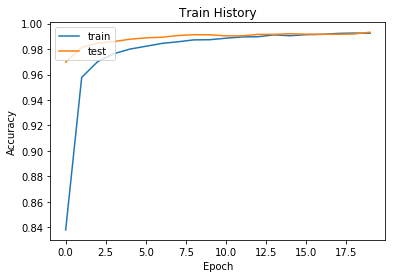

In [7]:
show_train_history('accuracy','val_accuracy')

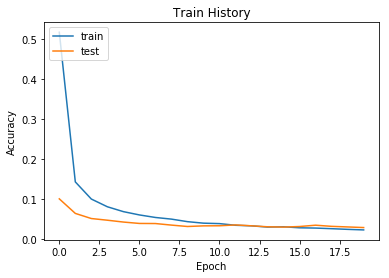

In [8]:
show_train_history('loss','val_loss')

In [9]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0199 - accuracy: 0.9939


0.9939000010490417

In [11]:
prediction=model.predict_classes(x_Test4D_normalize)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [13]:
prediction = np.argmax(model.predict(x_Test4D_normalize), axis=-1)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [14]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

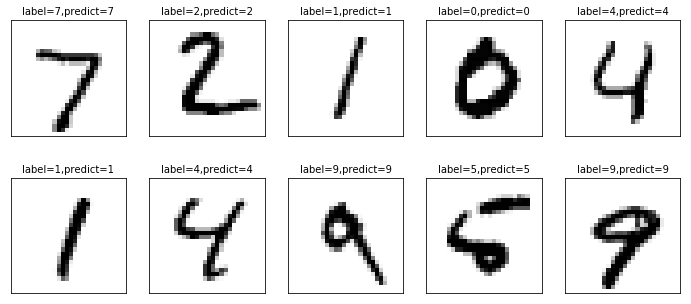

In [15]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [17]:
import pandas as pd
pd.crosstab(y_Test,prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,1,0,0,0,0,1,1,0,0
1,0,1134,0,1,0,0,0,0,0,0
2,1,1,1027,0,0,0,0,1,2,0
3,0,0,0,1003,0,4,0,0,2,1
4,0,0,0,0,976,0,1,0,1,4
5,1,0,0,4,0,884,1,0,0,2
6,3,2,0,0,2,1,949,0,1,0
7,0,1,0,0,1,0,0,1025,0,1
8,2,0,2,0,0,1,0,2,966,1


In [19]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2035,5,3
2369,5,3
2597,5,3


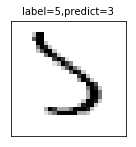

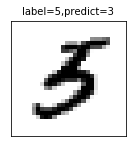

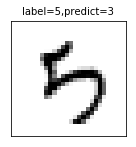

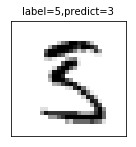

In [23]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=1393, num=1)
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=2035, num=1)
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=2369, num=1)
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=2597, num=1)

In [25]:
df[(df.label==9)&(df.predict==4)]

,label,predict
1232,9,4
1901,9,4
2293,9,4
3985,9,4


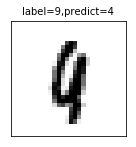

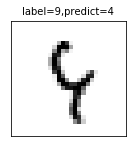

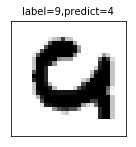

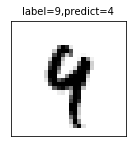

In [26]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=1232, num=1)
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=1901, num=1)
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=2293, num=1)
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=3985, num=1)